# DECISION TREE REGRESSION

In [260]:
from warnings import filterwarnings
filterwarnings('ignore')

In [261]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [263]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [264]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

# Seprate X and Y 

In [265]:
X = df.drop(columns=['PROFIT'])
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [266]:
Y = df[['PROFIT']]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Seprate CAT AND CON

In [267]:
cat = list(X.columns[X.dtypes=='object'])
cat

['STATE']

In [268]:
con = list(X.columns[X.dtypes!='object'])
con

['RND', 'ADMIN', 'MKT']

# PREPROCESSING PIPELINE 

In [269]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [270]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [271]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [272]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('OHE',OneHotEncoder(handle_unknown='ignore'))])
cat_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('OHE', OneHotEncoder(handle_unknown='ignore'))])

In [273]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['STATE'])])

In [274]:
X_pre = pre.fit_transform(X)
X_pre[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  0.        ,  0.        ,
         1.        ],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.        ,  0.        ,
         0.        ],
       [ 1.75436374, -0.72825703,  1.62652767,  0.        ,  1.        ,
         0.        ],
       [ 1.55478369, -0.09636463,  1.42221024,  0.        ,  0.        ,
         1.        ],
       [ 1.5049372 , -1.07991935,  1.28152771,  0.        ,  1.        ,
         0.        ]])

In [275]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [276]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


# Train Test Split


In [277]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33)

In [278]:
xtrain.shape

(33, 6)

In [279]:
xtest.shape

(17, 6)

# CREATE A DECISON TREE MODEL

In [280]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1, min_samples_split=5, min_samples_leaf=6, criterion='squared_error')

In [281]:
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=6, min_samples_split=5)

In [282]:
model.score(xtrain,ytrain)

0.642297901637265

In [283]:
model.score(xtest,ytest)

0.5845795790280667

#HYPERPARAMTER TUNNING

In [284]:
params = {'max_depth':[1,2,3,4,5,6,7,8],
          'min_samples_leaf':[3,4,5,6,7,8],
          'min_samples_split':[5,6,7,8,9,10],
          'criterion':['squared_error','absolute_error']}

In [285]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()

In [286]:
gscv = GridSearchCV(dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [287]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [288]:
gscv.best_score_

-238833456.04138932

In [289]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=2, min_samples_leaf=3, min_samples_split=7)

# EVALUATE THE MODEL

In [290]:
best_dtr.score(xtrain,ytrain)

0.896224471770306

In [291]:
best_dtr.score(xtest,ytest)

0.8259427626171034

# Predict the model results

In [292]:
ypred_ts = model.predict(xtest)
ypred_ts

array([155376.36777778, 155376.36777778, 155376.36777778, 155376.36777778,
        90781.74041667, 155376.36777778, 155376.36777778,  90781.74041667,
        90781.74041667,  90781.74041667, 155376.36777778, 155376.36777778,
        90781.74041667,  90781.74041667, 155376.36777778, 155376.36777778,
        90781.74041667])

In [293]:
ypred_tr = model.predict(xtrain)
ypred_tr

array([155376.36777778,  90781.74041667,  90781.74041667,  90781.74041667,
       155376.36777778,  90781.74041667,  90781.74041667,  90781.74041667,
        90781.74041667,  90781.74041667,  90781.74041667, 155376.36777778,
        90781.74041667,  90781.74041667, 155376.36777778,  90781.74041667,
        90781.74041667,  90781.74041667,  90781.74041667, 155376.36777778,
        90781.74041667,  90781.74041667,  90781.74041667, 155376.36777778,
        90781.74041667,  90781.74041667,  90781.74041667, 155376.36777778,
        90781.74041667, 155376.36777778,  90781.74041667, 155376.36777778,
        90781.74041667])

# Check model MSE MAE RMSE R2

In [294]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [295]:
ypred = model.predict(xtrain)

In [296]:
mse = mean_squared_error(ytrain, ypred)
mse

460896754.96205

In [297]:
msa = mean_squared_error(ytrain, ypred)
msa

460896754.96205

In [298]:
r2_score = r2_score(ytrain, ypred)
r2_score

0.642297901637265

In [299]:
rmse = mse**(1/2)
rmse

21468.50611854607

# Plotting The Decision Tree 

In [300]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

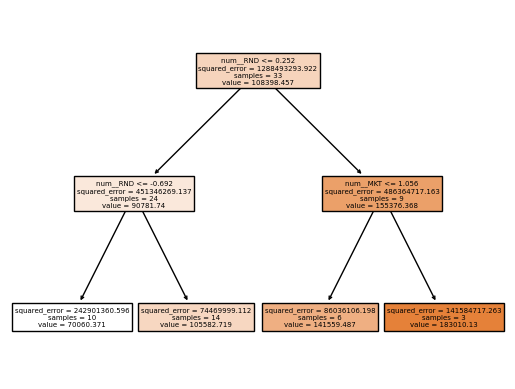

In [301]:
plot_tree(best_dtr, feature_names=list(xtrain.columns), filled=True)
plt.show()

# Plot Feature Importance

In [302]:
imp = best_dtr.feature_importances_
imp

array([0.90982635, 0.        , 0.09017365, 0.        , 0.        ,
       0.        ])

In [303]:
imp = pd.Series(imp)
imp

0    0.909826
1    0.000000
2    0.090174
3    0.000000
4    0.000000
5    0.000000
dtype: float64

In [304]:
imp = imp.sort_values(ascending=False)
imp

0    0.909826
2    0.090174
1    0.000000
3    0.000000
4    0.000000
5    0.000000
dtype: float64

<Axes: title={'center': 'Feature_Importanses'}>

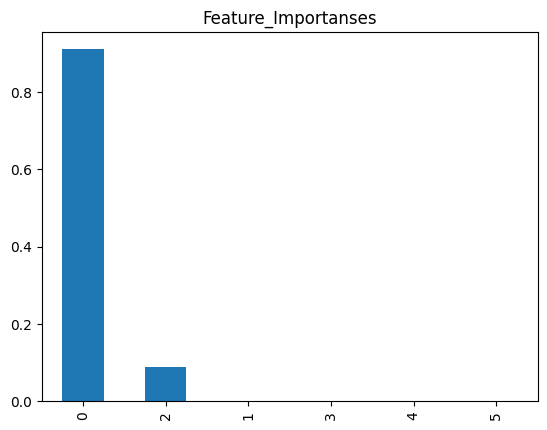

In [305]:
imp.plot(kind='bar',title='Feature_Importanses')

# Predicting out of sample data 

In [306]:
xnew = pd.read_csv('test.csv')
xnew

,RND,ADMIN,MKT,STATE
0,78013.11,121597.55,264346.06,California
1,22177.74,154806.14,28334.72,California
2,23640.93,96189.63,148001.11,California
3,101913.08,110594.11,229160.95,Florida
4,77044.01,99281.34,140574.81,New York
5,542.05,51743.15,0.00,New York
6,61136.38,152701.92,88218.23,New York
7,100671.96,91790.61,249744.55,California
8,28663.76,127056.21,201126.82,Florida
9,20229.59,65947.93,185265.10,New York


In [307]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     15 non-null     float64
 1   ADMIN   15 non-null     float64
 2   MKT     15 non-null     float64
 3   STATE   15 non-null     object 
dtypes: float64(3), object(1)
memory usage: 612.0+ bytes


In [308]:
xnew.isna().sum()

RND      0
ADMIN    0
MKT      0
STATE    0
dtype: int64

# Transform the above data 

In [309]:
xnew_pre = pre.transform(xnew)
xnew_pre

array([[ 0.0944412 ,  0.00911842,  0.44044622,  1.        ,  0.        ,
         0.        ],
       [-1.13430539,  1.20641936, -1.50907418,  1.        ,  0.        ,
         0.        ],
       [-1.10210556, -0.90693753, -0.52059596,  1.        ,  0.        ,
         0.        ],
       [ 0.62039825, -0.38759909,  0.14980727,  0.        ,  1.        ,
         0.        ],
       [ 0.0731146 , -0.79546917, -0.5819393 ,  0.        ,  0.        ,
         1.        ],
       [-1.61043334, -2.50940884, -1.74312698,  0.        ,  0.        ,
         1.        ],
       [-0.27695823,  1.13055391, -1.01441945,  0.        ,  0.        ,
         1.        ],
       [ 0.59308542, -1.0655396 ,  0.31983362,  1.        ,  0.        ,
         0.        ],
       [-0.99157015,  0.20592469, -0.08176257,  0.        ,  1.        ,
         0.        ],
       [-1.17717755, -1.99727037, -0.21278487,  0.        ,  0.        ,
         1.        ],
       [-1.60035036,  0.10125394, -1.72739998,  0.

In [310]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,0.094441,0.009118,0.440446,1.0,0.0,0.0
1,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
2,-1.102106,-0.906938,-0.520596,1.0,0.0,0.0
3,0.620398,-0.387599,0.149807,0.0,1.0,0.0
4,0.073115,-0.795469,-0.581939,0.0,0.0,1.0


# Predict the profit of the startup


In [311]:
pred= best_dtr.predict(xnew_pre)
pred

array([105582.71857143,  70060.371     ,  70060.371     , 141559.48666667,
       105582.71857143,  70060.371     , 105582.71857143, 141559.48666667,
        70060.371     ,  70060.371     ,  70060.371     , 141559.48666667,
       105582.71857143, 141559.48666667,  70060.371     ])

# Save the above results to xnew


In [312]:
xnew['Profit_Pred']=pred
xnew

,RND,ADMIN,MKT,STATE,Profit_Pred
0,78013.11,121597.55,264346.06,California,105582.718571
1,22177.74,154806.14,28334.72,California,70060.371000
2,23640.93,96189.63,148001.11,California,70060.371000
3,101913.08,110594.11,229160.95,Florida,141559.486667
4,77044.01,99281.34,140574.81,New York,105582.718571
5,542.05,51743.15,0.00,New York,70060.371000
6,61136.38,152701.92,88218.23,New York,105582.718571
7,100671.96,91790.61,249744.55,California,141559.486667
8,28663.76,127056.21,201126.82,Florida,70060.371000
9,20229.59,65947.93,185265.10,New York,70060.371000


# Save the above file to csv


In [313]:
xnew.to_csv('RESULTS.csv',index=False)